In [1]:
import os
import pandas as pd
import pyfixest as pf
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib.patches import Patch
import warnings
warnings.filterwarnings("ignore")

plt.rcParams.update({'font.size': 16})
plt.rc('xtick', labelsize=14) # Set x-axis tick label size
plt.rc('ytick', labelsize=14)

In [2]:
root_dir = '/dartfs-hpc/rc/lab/C/CMIG'
project_dir = os.path.join(root_dir,'damages','county')

In [3]:
mod_mat = pd.read_csv(os.path.join(project_dir,'data','processed','panels','imerg_clsm-grace_county_panel.csv'))
# mod_mat = mod_mat[mod_mat.year<=2023]

In [4]:
mod_lag1 = pf.feols("growth~ppt_ann+ppt_ann_sq+tmean+tmean_sq+ppt_ann_lag1+ppt_ann_sq_lag1+tmean_lag1+tmean_sq_lag1+(p_exc_rxmon+p_exc_rxmon_sq)+(p_exc_rxmon_lag1+p_exc_rxmon_sq_lag1)|county + year",vcov={"CRV1":"state"},data=mod_mat)


In [ ]:
loo_county = {}
for s in mod_mat['county'].unique():
    mod = pf.feols("growth~ppt_ann+ppt_ann_sq+tmean+tmean_sq+ppt_ann_lag1+ppt_ann_sq_lag1+tmean_lag1+tmean_sq_lag1+(p_exc_rxmon+p_exc_rxmon_sq)+(p_exc_rxmon_lag1+p_exc_rxmon_sq_lag1)|county + year",vcov={"CRV1":"county"},data=mod_mat[mod_mat.county!=s])
    loo_county[s] = mod.coef()
    # print(s,mod.pvalue()['p_exc_rxmon_sq'],mod.coef()['p_exc_rxmon']/-2/mod.coef()['p_exc_rxmon_sq'])

In [5]:
loo_state = {}
for s in mod_mat['state'].unique():
    mod = pf.feols("growth~ppt_ann+ppt_ann_sq+tmean+tmean_sq+ppt_ann_lag1+ppt_ann_sq_lag1+tmean_lag1+tmean_sq_lag1+(p_exc_rxmon+p_exc_rxmon_sq)+(p_exc_rxmon_lag1+p_exc_rxmon_sq_lag1)|county + year",vcov={"CRV1":"state"},data=mod_mat[mod_mat.state!=s])
    loo_state[s] = mod.coef()
    print(s,mod.pvalue()['p_exc_rxmon_sq'],mod.coef()['p_exc_rxmon']/-2/mod.coef()['p_exc_rxmon_sq'])

AL 0.0017168355255310352 80.04705294424507
AZ 0.0015180728699142332 76.40383585921283
AR 0.0013537237577223582 74.30774504155272
CA 0.003125847177629204 77.72163703930032
CO 0.001440086141455632 69.84185680702241
CT 0.001478877127322198 77.6541651929057
DE 0.001449854969617581 76.72938323048196
DC 0.001444092387154372 76.93769560984198
FL 0.0007256346613746523 73.55821899464908
GA 0.003061612697570215 92.25869227191919
ID 0.001451819511059993 79.33635004146844
IL 0.0018000592770213153 76.87605032947377
IN 0.0017561952404567815 82.35099017158592
IA 0.0020583002907859083 64.17355441388223
KS 0.0012713889968718473 110.22750971276467
KY 0.0015437659867716391 75.76204864646803
LA 0.0006676235375091544 48.04062454402727
ME 0.001365408535631607 75.58317478124307
MD 0.001421326066997075 75.08082325296319
MA 0.0014294059961625916 76.05176849352398
MI 0.004805282439517722 77.20084277213223
MN 0.002466149102785753 92.29879902030902
MS 0.0008936739049052456 71.40062776222062
MO 0.00068035916740072

In [6]:
loo_year = {}
for s in mod_mat['year'].unique():
    mod = pf.feols("growth~ppt_ann+ppt_ann_sq+tmean+tmean_sq+ppt_ann_lag1+ppt_ann_sq_lag1+tmean_lag1+tmean_sq_lag1+(p_exc_rxmon+p_exc_rxmon_sq)+(p_exc_rxmon_lag1+p_exc_rxmon_sq_lag1)|county + year",vcov={"CRV1":"state"},data=mod_mat[mod_mat.year!=s])
    loo_year[s] = mod.coef()
    print(s,mod.pvalue()['p_exc_rxmon_sq'],mod.coef()['p_exc_rxmon']/-2/mod.coef()['p_exc_rxmon_sq'])

2003 0.0014246913529563088 76.86524912150884
2004 0.0265179983242414 169.24784159566417
2005 0.0015498188856397643 85.58608010050736
2006 0.0003438097312669086 73.53865443483612
2007 0.0004481923663859355 60.690126745482594
2008 0.001103020000250421 89.06483364435555
2009 0.002768820688968221 64.9266091858285
2010 0.000981904453981608 88.46945268842377
2011 0.0029324825653809228 78.50439037164784
2012 0.002543248311404289 76.67310313390527
2013 0.0017335873425690096 83.39818236284137
2014 0.0020759561820138384 99.8635515424844
2015 0.0006931593631778199 76.93620771202156
2016 0.002293660367751471 63.6203578150821
2017 0.004717577321801558 55.58026274056703
2018 0.002623170974458411 74.94154360029934
2019 0.002853428277883374 63.28579300071644
2020 0.001054816074242959 47.11594253485685
2021 0.0021331481309461164 67.70143158409896
2022 0.0009766614347404001 79.12956398364555
2023 0.0012416002298469841 84.69009712455187
2024 0.0009312402248031759 70.2675322988831


In [7]:
mod_precovid = pf.feols("growth~ppt_ann+ppt_ann_sq+tmean+tmean_sq+ppt_ann_lag1+ppt_ann_sq_lag1+tmean_lag1+tmean_sq_lag1+(p_exc_rxmon+p_exc_rxmon_sq)+(p_exc_rxmon_lag1+p_exc_rxmon_sq_lag1)|county + year",data=mod_mat[mod_mat.year<2020])
print(mod_precovid.pvalue()['p_exc_rxmon_sq'],mod_precovid.coef()['p_exc_rxmon']/-2/mod_precovid.coef()['p_exc_rxmon_sq'])

1.7609913527394383e-11 51.697258492129


In [8]:
# Winsorized flood potential and/or growth values to middle 99 percentile
mod_mat_flood_wins = mod_mat.copy()
flood_qs = mod_mat.p_exc_rxmon.quantile([0.005,0.995]).values
mod_mat_flood_wins.loc[mod_mat_flood_wins['p_exc_rxmon']>flood_qs[1],'p_exc_rxmon'] = flood_qs[1]
mod_mat_flood_wins.loc[mod_mat_flood_wins['p_exc_rxmon']<flood_qs[0],'p_exc_rxmon'] = flood_qs[0]
mod_mat_flood_wins.loc[mod_mat_flood_wins['p_exc_rxmon_lag1']>flood_qs[1],'p_exc_rxmon_lag1'] = flood_qs[1]
mod_mat_flood_wins.loc[mod_mat_flood_wins['p_exc_rxmon_lag1']<flood_qs[0],'p_exc_rxmon_lag1'] = flood_qs[0]

mod_mat_growth_wins = mod_mat.copy()
growth_qs = mod_mat.growth.quantile([0.005,0.995]).values
mod_mat_growth_wins.loc[mod_mat_growth_wins['growth']>growth_qs[1],'growth'] = growth_qs[1]
mod_mat_growth_wins.loc[mod_mat_growth_wins['growth']<growth_qs[0],'growth'] = growth_qs[0]

mod_mat_both_wins = mod_mat.copy()
mod_mat_both_wins.loc[mod_mat_both_wins['growth']>growth_qs[1],'growth'] = growth_qs[1]
mod_mat_both_wins.loc[mod_mat_both_wins['growth']<growth_qs[0],'growth'] = growth_qs[0]
mod_mat_both_wins.loc[mod_mat_both_wins['p_exc_rxmon']>flood_qs[1],'p_exc_rxmon'] = flood_qs[1]
mod_mat_both_wins.loc[mod_mat_both_wins['p_exc_rxmon']<flood_qs[0],'p_exc_rxmon'] = flood_qs[0]
mod_mat_both_wins.loc[mod_mat_both_wins['p_exc_rxmon_lag1']>flood_qs[1],'p_exc_rxmon_lag1'] = flood_qs[1]
mod_mat_both_wins.loc[mod_mat_both_wins['p_exc_rxmon_lag1']<flood_qs[0],'p_exc_rxmon_lag1'] = flood_qs[0]

mod_growth_wins = pf.feols("growth~ppt_ann+ppt_ann_sq+tmean+tmean_sq+ppt_ann_lag1+ppt_ann_sq_lag1+tmean_lag1+tmean_sq_lag1+(p_exc_rxmon+p_exc_rxmon_sq)+(p_exc_rxmon_lag1+p_exc_rxmon_sq_lag1)|county + year",
                           data=mod_mat_growth_wins)
mod_flood_wins = pf.feols("growth~ppt_ann+ppt_ann_sq+tmean+tmean_sq+ppt_ann_lag1+ppt_ann_sq_lag1+tmean_lag1+tmean_sq_lag1+(p_exc_rxmon+p_exc_rxmon_sq)+(p_exc_rxmon_lag1+p_exc_rxmon_sq_lag1)|county + year",
                          data=mod_mat_flood_wins)
mod_both_wins = pf.feols("growth~ppt_ann+ppt_ann_sq+tmean+tmean_sq+ppt_ann_lag1+ppt_ann_sq_lag1+tmean_lag1+tmean_sq_lag1+(p_exc_rxmon+p_exc_rxmon_sq)+(p_exc_rxmon_lag1+p_exc_rxmon_sq_lag1)|county + year",
                          data=mod_mat_both_wins)

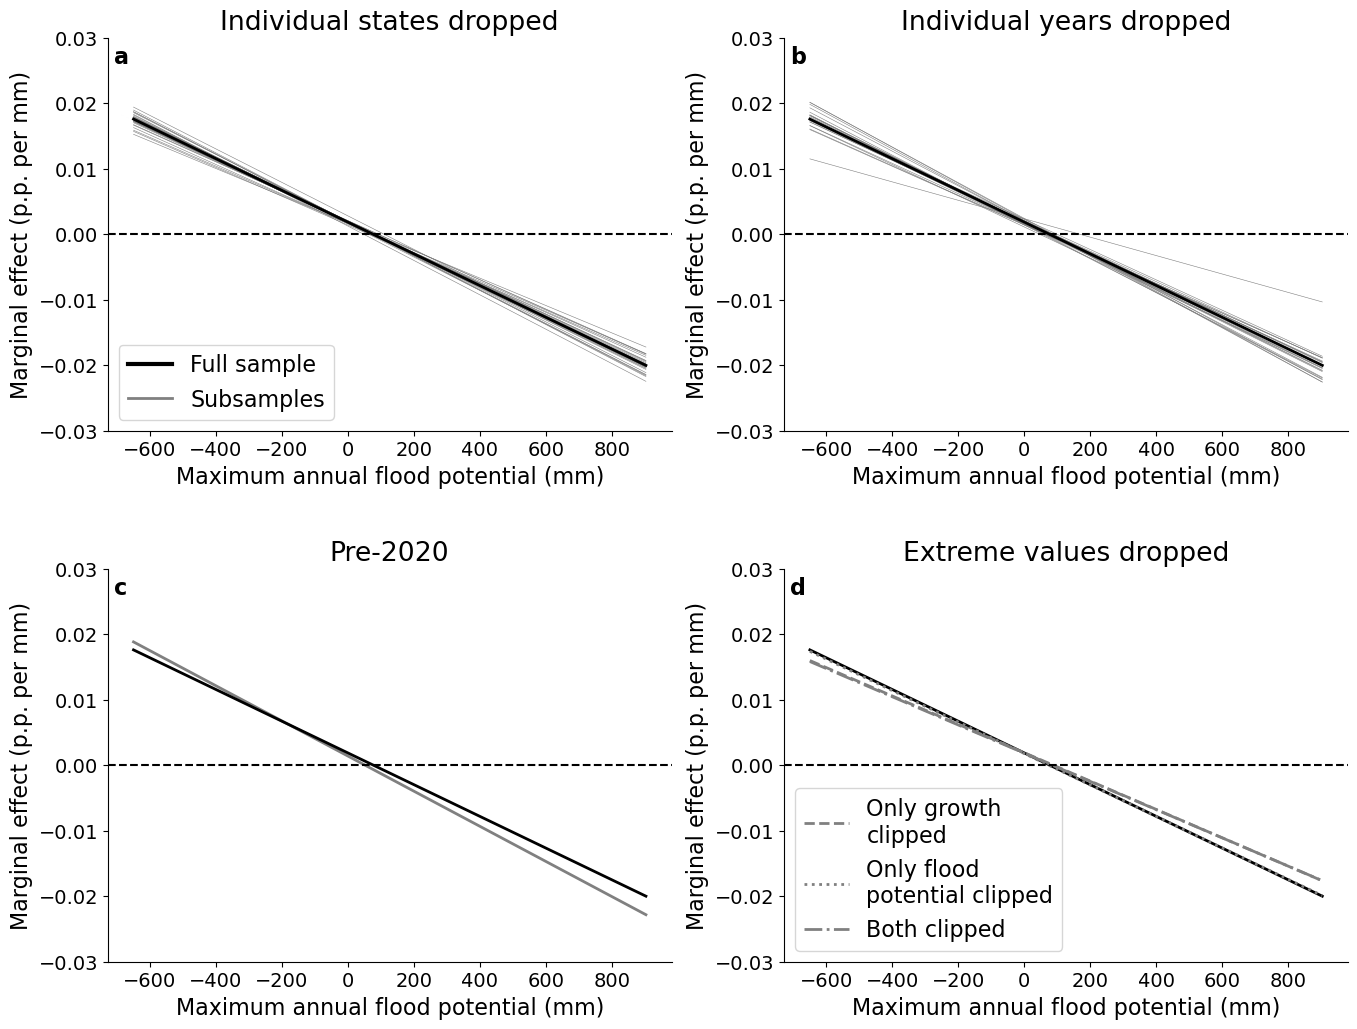

In [9]:

xmin = mod_mat['p_exc_rxmon'].min()
xmax = mod_mat['p_exc_rxmon'].max()
ps = np.linspace(xmin,xmax,100)
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib.lines import Line2D
fig = plt.figure(figsize=(16,12))
gs = gridspec.GridSpec(nrows=2,ncols=2,hspace=0.35,figure=fig)
ax1 = plt.subplot(gs[0,0])
for k,v in loo_state.items():
    ax1.plot(ps,v['p_exc_rxmon']+2*ps*v['p_exc_rxmon_sq'],label=s,color='tab:grey',lw=0.4)
ax1.plot(ps,mod_lag1.coef()['p_exc_rxmon']+2*ps*mod_lag1.coef()['p_exc_rxmon_sq'],color='black',lw=2)
ax1.set_ylim(-0.03,0.03)
ax1.title.set_text("Individual states dropped")
leg_el = [Line2D([0], [0], color='black', label='Full sample',lw=3),
          Line2D([0], [0], color='grey', label='Subsamples',lw=2),
         ]
ax1.legend(handles=leg_el,loc='lower left')
ax2 = plt.subplot(gs[0,1],sharey=ax1)
for k,v in loo_year.items():
    ax2.plot(ps,v['p_exc_rxmon']+2*ps*v['p_exc_rxmon_sq'],label=s,color='tab:grey',lw=0.4)
ax2.plot(ps,mod_lag1.coef()['p_exc_rxmon']+2*ps*mod_lag1.coef()['p_exc_rxmon_sq'],color='black',lw=2)
ax2.title.set_text("Individual years dropped")

ax3 = plt.subplot(gs[1,0],sharey=ax1)
ax3.plot(ps,mod_precovid.coef()['p_exc_rxmon']+2*ps*mod_precovid.coef()['p_exc_rxmon_sq'],color='grey',lw=2)
ax3.plot(ps,mod_lag1.coef()['p_exc_rxmon']+2*ps*mod_lag1.coef()['p_exc_rxmon_sq'],color='black',lw=2)
ax3.title.set_text("Pre-2020")

ax4 = plt.subplot(gs[1,1],sharey=ax1)
ax4.plot(ps,mod_lag1.coef()['p_exc_rxmon']+2*ps*mod_lag1.coef()['p_exc_rxmon_sq'],color='black',lw=2)
ax4.plot(ps,mod_growth_wins.coef()['p_exc_rxmon']+2*ps*mod_growth_wins.coef()['p_exc_rxmon_sq'],color='grey',lw=2,linestyle='--',label='Only growth\nclipped')
ax4.plot(ps,mod_flood_wins.coef()['p_exc_rxmon']+2*ps*mod_flood_wins.coef()['p_exc_rxmon_sq'],color='grey',lw=2,linestyle=':',label='Only flood\npotential clipped')
ax4.plot(ps,mod_both_wins.coef()['p_exc_rxmon']+2*ps*mod_both_wins.coef()['p_exc_rxmon_sq'],color='grey',lw=2,linestyle='-.',label='Both clipped')
ax4.title.set_text("Extreme values dropped")
ax4.legend(loc='lower left')

for ax in [ax1,ax2,ax3,ax4]:
    ax.axhline(0,color='black',linestyle='--')
    ax.set_ylabel("Marginal effect (p.p. per mm)")
    ax.set_xlabel("Maximum annual flood potential (mm)")
    
labels = ['a','b','c','d']
for i,ax in enumerate([ax1,ax2,ax3,ax4]):
    ax.text(0.01,0.98,labels[i],ha='left',va='top',fontsize=16,fontweight='bold',transform=ax.transAxes)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
plt.savefig(os.path.join(project_dir,'figures','supp_mat','robustness.png'),bbox_inches='tight',dpi=350)
plt.savefig(os.path.join(project_dir,'figures','supp_mat','robustness.pdf'),bbox_inches='tight',dpi=350)
plt.show()

In [10]:
gdf = gpd.read_file(os.path.join(project_dir,'data','interim','cnty_bnds_fixed'))
gdf['geometry'] = gdf['geometry'].representative_point()

import numpy as np
from pyproj import Geod
from geopy.distance import great_circle

# extract lon/lat
lons = gdf.geometry.x.to_numpy()
lats = gdf.geometry.y.to_numpy()

geod = Geod(ellps="WGS84")

# indices for unique pairs (i < j)
i, j = np.triu_indices(len(gdf), k=1)

# vectorized geodesic distance (meters)
_, _, dist_m = geod.inv(lons[i], lats[i], lons[j], lats[j])

dist_km = dist_m / 1000.0

import pandas as pd

pairs = pd.DataFrame({
    "idx_i": i,
    "idx_j": j,
    "distance_km": dist_km
})

# Optional: map to GeoDataFrame index values (if not RangeIndex)
pairs["region1"] = gdf.county.values[pairs["idx_i"]]
pairs["region2"] = gdf.county.values[pairs["idx_j"]]



ERROR 1: PROJ: proj_create_from_database: Open of /dartfs-hpc/rc/home/0/f004260/.conda/envs/arg24/share/proj failed


In [11]:
import xarray as xr
df = mod_lag1._data
df['resid'] = mod_lag1.resid()
resid = xr.Dataset.from_dataframe(df.set_index(['county','year'])[['resid']])
regions = resid['county'].values
data_2d = resid['resid'].transpose("year", "county").values 
corr_matrix = np.corrcoef(data_2d, rowvar=False)  # shape: (n_regions, n_regions)

# Extract upper triangle without diagonal
i_upper, j_upper = np.triu_indices(len(regions), k=1)
corr_df = pd.DataFrame({
    "region1": regions[i_upper],
    "region2": regions[j_upper],
    "correlation": corr_matrix[i_upper, j_upper]
})

state_dict = dict(zip(mod_mat['county'],mod_mat['state']))
corr_df['state1'] = corr_df['region1'].map(state_dict)
corr_df['state2'] = corr_df['region2'].map(state_dict)

corr_df = corr_df.merge(pairs[['region1','region2','distance_km']],on=['region1','region2'])
corr_df['dist_bin'] = pd.cut(corr_df['distance_km'],bins=np.arange(0,5001,20),labels=np.arange(0,5001,20)[:-1])
mean_by_dist = corr_df.groupby("dist_bin")['correlation'].mean()
std_by_dist = corr_df.groupby("dist_bin")['correlation'].std()
ci_by_dist = corr_df.groupby("dist_bin").apply(lambda g: g['correlation'].quantile([0.025,0.975]))

In [22]:
ppt_prods = ['chirps','cpc','imerg','prism',]
tws_prods = ['grace-csr','grace-jpl','clsm-grace']
prod_comb = []
for p in ppt_prods:
    for t in tws_prods:
        prod_comb.append(f"{p}_{t}")
cnty_coef_dict = {p:pd.read_csv(os.path.join(project_dir,'data','processed','damage_func_coefs',p,'county_se','lag1.csv')).set_index("Coefficient") for p in prod_comb}
state_coef_dict = {p:pd.read_csv(os.path.join(project_dir,'data','processed','damage_func_coefs',p,'state_se','lag1.csv')).set_index("Coefficient") for p in prod_comb}
yr_coef_dict = {p:pd.read_csv(os.path.join(project_dir,'data','processed','damage_func_coefs',p,'year_se','lag1.csv')).set_index("Coefficient") for p in prod_comb}


In [23]:
fp = np.linspace(mod_mat['p_exc_rxmon'].min(),mod_mat['p_exc_rxmon'].max(),100)


In [24]:
cnty_lag1_me0 = {p:cnty_lag1_coef.loc['p_exc_rxmon'].values.reshape(-1,1)+2*np.outer(cnty_lag1_coef.loc['p_exc_rxmon_sq'],fp) for p,cnty_lag1_coef in cnty_coef_dict.items()}
cnty_lag1_me1 = {p:cnty_lag1_me0[p] + cnty_lag1_coef.loc['p_exc_rxmon_lag1'].values.reshape(-1,1)+2*np.outer(cnty_lag1_coef.loc['p_exc_rxmon_sq_lag1'],fp) for p,cnty_lag1_coef in cnty_coef_dict.items()}

cnty_lag1_me0_all = np.concatenate(list(cnty_lag1_me0.values()),axis=0)
cnty_lag1_me1_all = np.concatenate(list(cnty_lag1_me1.values()),axis=0)

state_lag1_me0 = {p:state_lag1_coef.loc['p_exc_rxmon'].values.reshape(-1,1)+2*np.outer(state_lag1_coef.loc['p_exc_rxmon_sq'],fp) for p,state_lag1_coef in state_coef_dict.items()}
state_lag1_me1 = {p:state_lag1_me0[p] + state_lag1_coef.loc['p_exc_rxmon_lag1'].values.reshape(-1,1)+2*np.outer(state_lag1_coef.loc['p_exc_rxmon_sq_lag1'],fp) for p,state_lag1_coef in state_coef_dict.items()}

state_lag1_me0_all = np.concatenate(list(state_lag1_me0.values()),axis=0)
state_lag1_me1_all = np.concatenate(list(state_lag1_me1.values()),axis=0)

In [25]:
yr_lag1_me0 = {p:yr_lag1_coef.loc['p_exc_rxmon'].values.reshape(-1,1)+2*np.outer(yr_lag1_coef.loc['p_exc_rxmon_sq'],fp) for p,yr_lag1_coef in yr_coef_dict.items()}
yr_lag1_me1 = {p:yr_lag1_me0[p] + yr_lag1_coef.loc['p_exc_rxmon_lag1'].values.reshape(-1,1)+2*np.outer(yr_lag1_coef.loc['p_exc_rxmon_sq_lag1'],fp) for p,yr_lag1_coef in yr_coef_dict.items()}

yr_lag1_me0_all = np.concatenate(list(yr_lag1_me0.values()),axis=0)
yr_lag1_me1_all = np.concatenate(list(yr_lag1_me1.values()),axis=0)

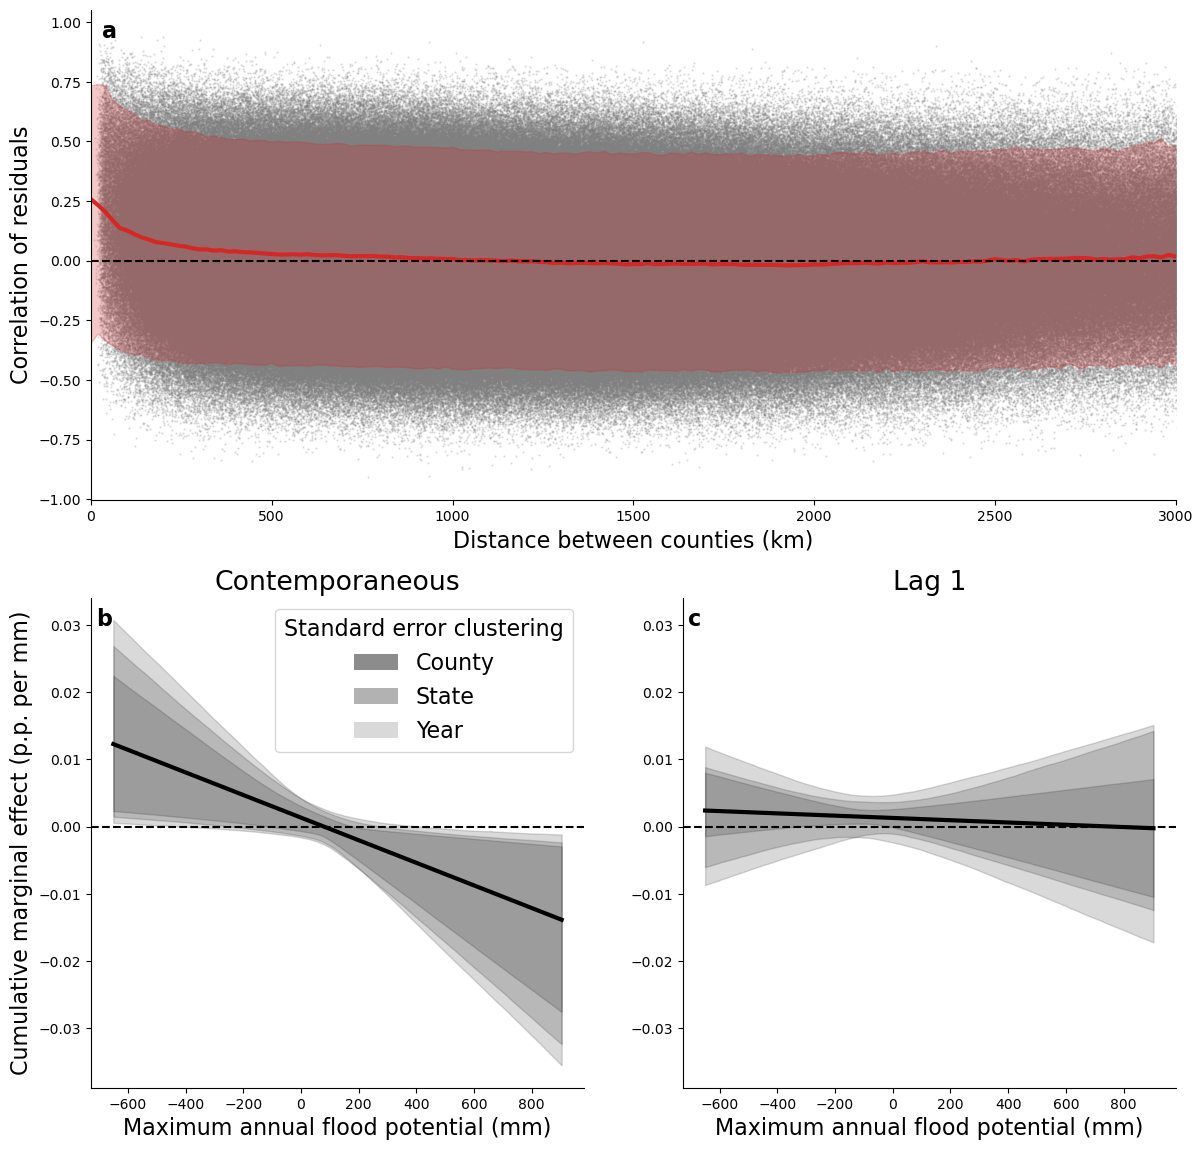

In [26]:

fig = plt.figure(figsize=(14,14))
gs = gridspec.GridSpec(nrows=2,ncols=2,figure=fig)

ax1 = plt.subplot(gs[0,:])
ax1.scatter(corr_df['distance_km'],corr_df['correlation'],color='grey',s=0.5,alpha=0.2)
ax1.plot(mean_by_dist.index,mean_by_dist.values,color='tab:red',lw=3)
ax1.fill_between(mean_by_dist.index,
                 ci_by_dist[0.025].values,
                 ci_by_dist[0.975].values,
                 color='tab:red',
                 alpha=0.25)
ax1.axhline(0,color='black',linestyle="--")
ax1.set_xlabel("Distance between counties (km)")
ax1.set_ylabel("Correlation of residuals")
ax1.set_xlim(0,3000)

ax2 = plt.subplot(gs[1,0])
ax2.axhline(0,color='black',linestyle='--')
ax2.plot(fp,cnty_lag1_me0_all.mean(axis=0),color='black',lw=3)
ax2.fill_between(fp,np.quantile(cnty_lag1_me0_all,0.025,axis=0),np.quantile(cnty_lag1_me0_all,0.975,axis=0),color='black',alpha=0.15,label='County')
ax2.fill_between(fp,np.quantile(state_lag1_me0_all,0.025,axis=0),np.quantile(state_lag1_me0_all,0.975,axis=0),color='black',alpha=0.15,label='State')
ax2.fill_between(fp,np.quantile(yr_lag1_me0_all,0.025,axis=0),np.quantile(yr_lag1_me0_all,0.975,axis=0),color='black',alpha=0.15,label='Year')

leg_el = [Patch(facecolor='black',alpha=0.45,label='County'),
          Patch(facecolor='black',alpha=0.3,label='State'),
          Patch(facecolor='black',alpha=0.15,label='Year')]
ax2.legend(loc='upper right',handles=leg_el,title='Standard error clustering')
ax2.title.set_text("Contemporaneous")

ax3 = plt.subplot(gs[1,1],sharey=ax2)
ax3.axhline(0,color='black',linestyle='--')
ax3.plot(fp,cnty_lag1_me1_all.mean(axis=0),color='black',lw=3)
ax3.fill_between(fp,np.quantile(cnty_lag1_me1_all,0.025,axis=0),np.quantile(cnty_lag1_me1_all,0.975,axis=0),color='black',alpha=0.15,label='County')
ax3.fill_between(fp,np.quantile(state_lag1_me1_all,0.025,axis=0),np.quantile(state_lag1_me1_all,0.975,axis=0),color='black',alpha=0.15,label='State')
ax3.fill_between(fp,np.quantile(yr_lag1_me1_all,0.025,axis=0),np.quantile(yr_lag1_me1_all,0.975,axis=0),color='black',alpha=0.15,label='Year')
ax3.title.set_text("Lag 1")
ax2.set_ylabel("Cumulative marginal effect (p.p. per mm)")
ax2.set_xlabel("Maximum annual flood potential (mm)")
ax3.set_xlabel("Maximum annual flood potential (mm)")
labels = ['a','b','c']
for i,ax in enumerate([ax1,ax2,ax3,]):
    ax.text(0.01,0.98,labels[i],ha='left',va='top',fontsize=16,fontweight='bold',transform=ax.transAxes)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
plt.savefig(os.path.join(project_dir,'figures','supp_mat','dmg_func_se_cluster.png'),bbox_inches='tight',dpi=350)
plt.savefig(os.path.join(project_dir,'figures','supp_mat','dmg_func_se_cluster.pdf'),bbox_inches='tight',dpi=350)
plt.show()

In [27]:
corr_df[corr_df['state1']==corr_df['state2']]['correlation'].mean()

np.float64(0.09496185009409859)

In [28]:
corr_df[corr_df['state1']==corr_df['state2']].groupby("state1")['correlation'].mean()

state1
AL    0.160111
AR    0.092586
AZ    0.214817
CA    0.106258
CO    0.069851
CT         NaN
DE    0.539611
FL    0.214799
GA    0.074313
IA    0.186795
ID    0.056293
IL    0.072846
IN    0.262081
KS    0.089634
KY    0.056987
LA    0.166950
MA    0.291118
MD    0.229167
ME    0.258405
MI    0.202827
MN    0.101567
MO    0.060141
MS    0.030511
MT    0.016747
NC    0.123312
ND    0.161624
NE    0.115303
NH    0.092266
NJ    0.345362
NM    0.081914
NV    0.169731
NY    0.204865
OH    0.130692
OK    0.086359
OR    0.077179
PA    0.121042
RI    0.462764
SC    0.138328
SD    0.133499
TN    0.127519
TX    0.060977
UT    0.131486
VA    0.028168
VT    0.186666
WA    0.098232
WI    0.103496
WV    0.036580
WY    0.133345
Name: correlation, dtype: float64

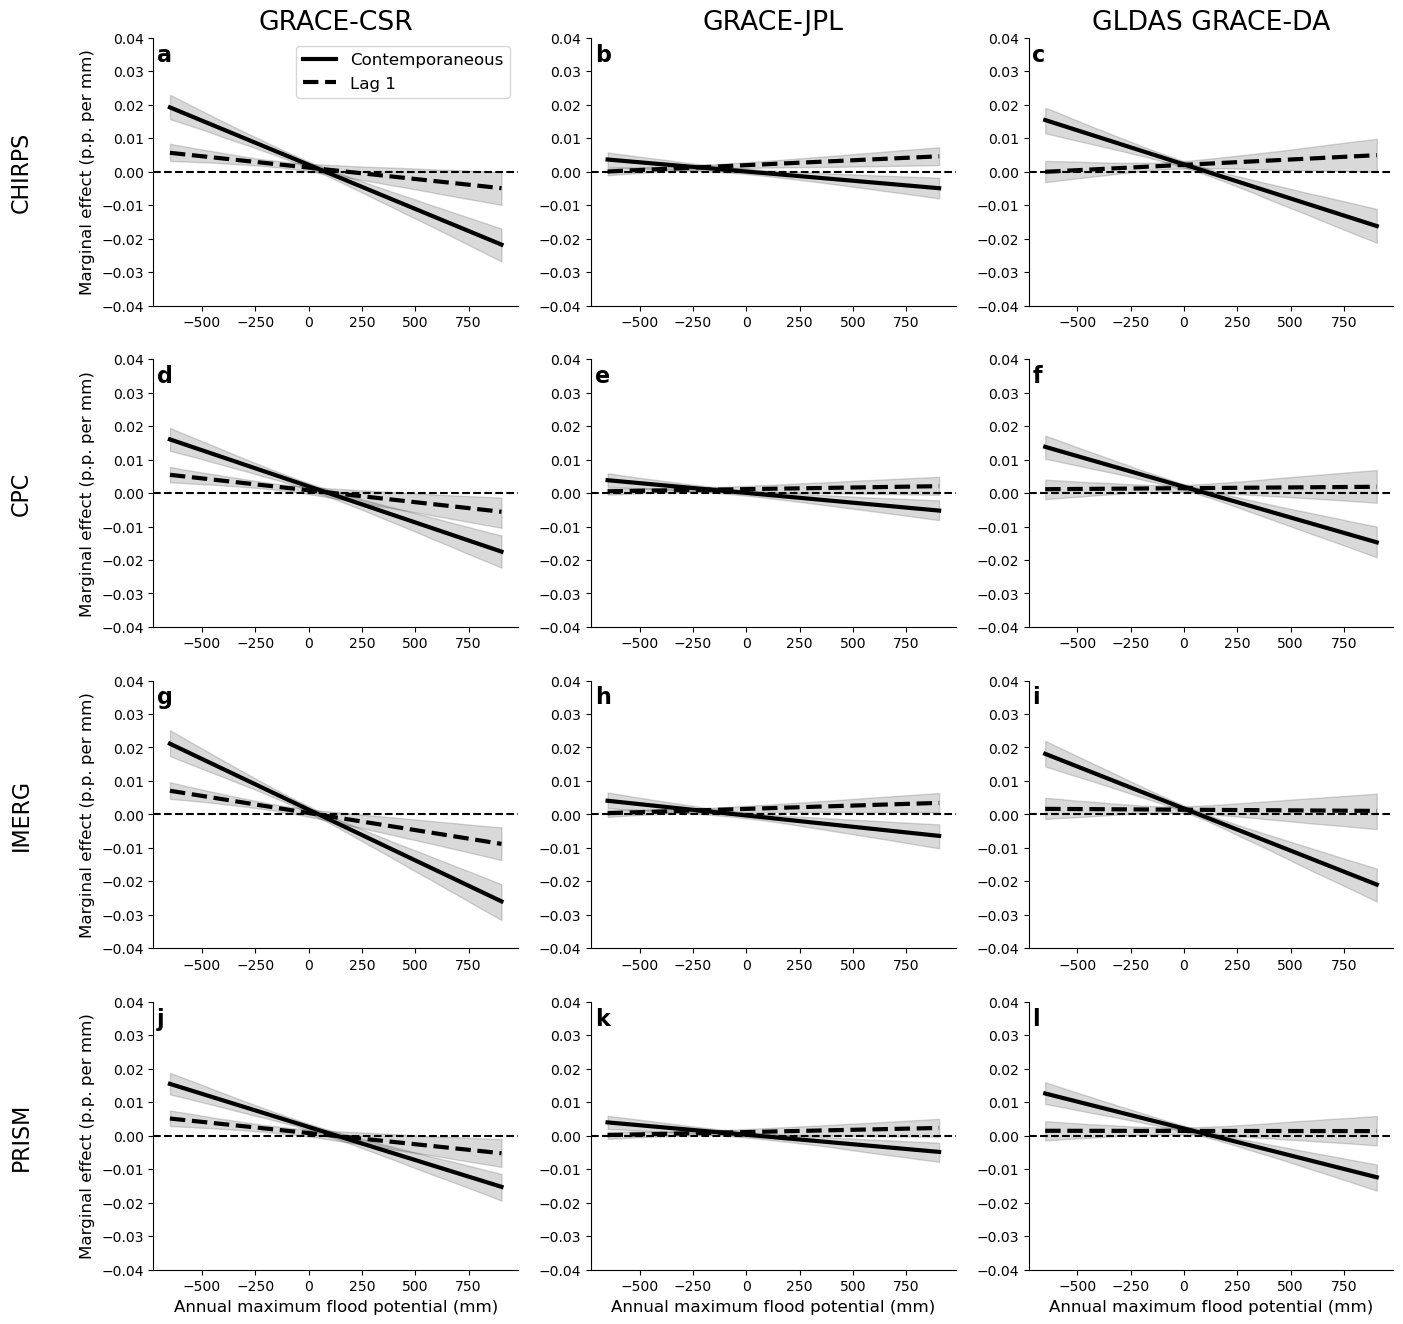

In [30]:
import matplotlib.gridspec as gridspec
plt.rcParams.update({'font.size': 16})
plt.rc('xtick', labelsize=10) # Set x-axis tick label size
plt.rc('ytick', labelsize=10) # Set y-axis tick label size

fig = plt.figure(figsize=(16,16))
gs = gridspec.GridSpec(nrows=4,ncols=3,figure=fig)
labels = ['a','b','c',
          'd','e','f',
          'g','h','i',
          'j','k','l']
for i,p in enumerate(prod_comb):
    ax = plt.subplot(gs[i])
    me0 = cnty_lag1_me0[p]
    me1 = cnty_lag1_me1[p]
    ax.plot(fp,me0.mean(axis=0),color='black',lw=3,label='Contemporaneous')
    ax.fill_between(fp,np.quantile(me0,0.025,axis=0),np.quantile(me0,0.975,axis=0),color='black',alpha=0.15)
    ax.plot(fp,me1.mean(axis=0),color='black',linestyle='--',lw=3,label='Lag 1')
    ax.fill_between(fp,np.quantile(me1,0.025,axis=0),np.quantile(me1,0.975,axis=0),color='black',alpha=0.15)
    ax.axhline(color='black',linestyle='--')
    if i==0:
        ax.legend(fontsize=12)
    # ax.title.set_text(p)
    ax.set_ylim(-0.04,0.04)
    if i%3==0:
        ax.set_ylabel("Marginal effect (p.p. per mm)",fontsize=12)
        ax.text(-0.33,0.5,p.split("_")[0].upper(),ha='right',va='center',rotation=90,transform=ax.transAxes)
    if i<3:
        if 'clsm' in p:
            ax.title.set_text('GLDAS GRACE-DA')
        else:   
            ax.title.set_text(p.split("_")[-1].upper())
    else:
        ax.title.set_text("")
    if i>=len(prod_comb)-3:
        ax.set_xlabel("Annual maximum flood potential (mm)",fontsize=12)
    ax.text(0.01,0.98,labels[i],ha='left',va='top',fontsize=16,fontweight='bold',transform=ax.transAxes)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
plt.savefig(os.path.join(project_dir,'figures','supp_mat','dmg_func_obs_uncert.png'),bbox_inches='tight',dpi=350)
plt.savefig(os.path.join(project_dir,'figures','supp_mat','dmg_func_obs_uncert.pdf'),bbox_inches='tight',dpi=350)
plt.show()

In [31]:
sep_coef_dict = {p:pd.read_csv(os.path.join(project_dir,'data','processed','damage_func_coefs',p,'county_se','sep_lag1.csv')).set_index("Coefficient") for p in prod_comb}
ps = np.arange(0,1001,10)
ts = np.arange(0,1001,10)
sep_lag1_me0 = np.empty((len(sep_coef_dict),len(ps),len(ts),1000))
for k,sep_lag1_coef in enumerate(sep_coef_dict.values()):
    for i,p in enumerate(ps):
        for j,t in enumerate(ts):
            sep_lag1_me0[k,i,j,:] = sep_lag1_coef.loc['rxmon_pexcmax']+2*p*sep_lag1_coef.loc['rxmon_pexcmax_sq']+t*sep_lag1_coef.loc['rxmon_pexcmax:tws_def_pre_pexcmax']#+2*p*t*sep_lag1_coef.loc['rxmon_pexcmax_sq:twsa_pre_pexcmax']
ci_lo_me0 = np.quantile(sep_lag1_me0,0.025,axis=-1)
ci_hi_me0 = np.quantile(sep_lag1_me0,0.975,axis=-1)



78.18499335815156
15.743109421760835
107.59196742636712
93.84924182734764
10.397368848329522
102.92400841653713
47.09853163793379
-45.80687187531929
70.13139892699209
134.9836339182955
63.44175296955365
136.31103489949126


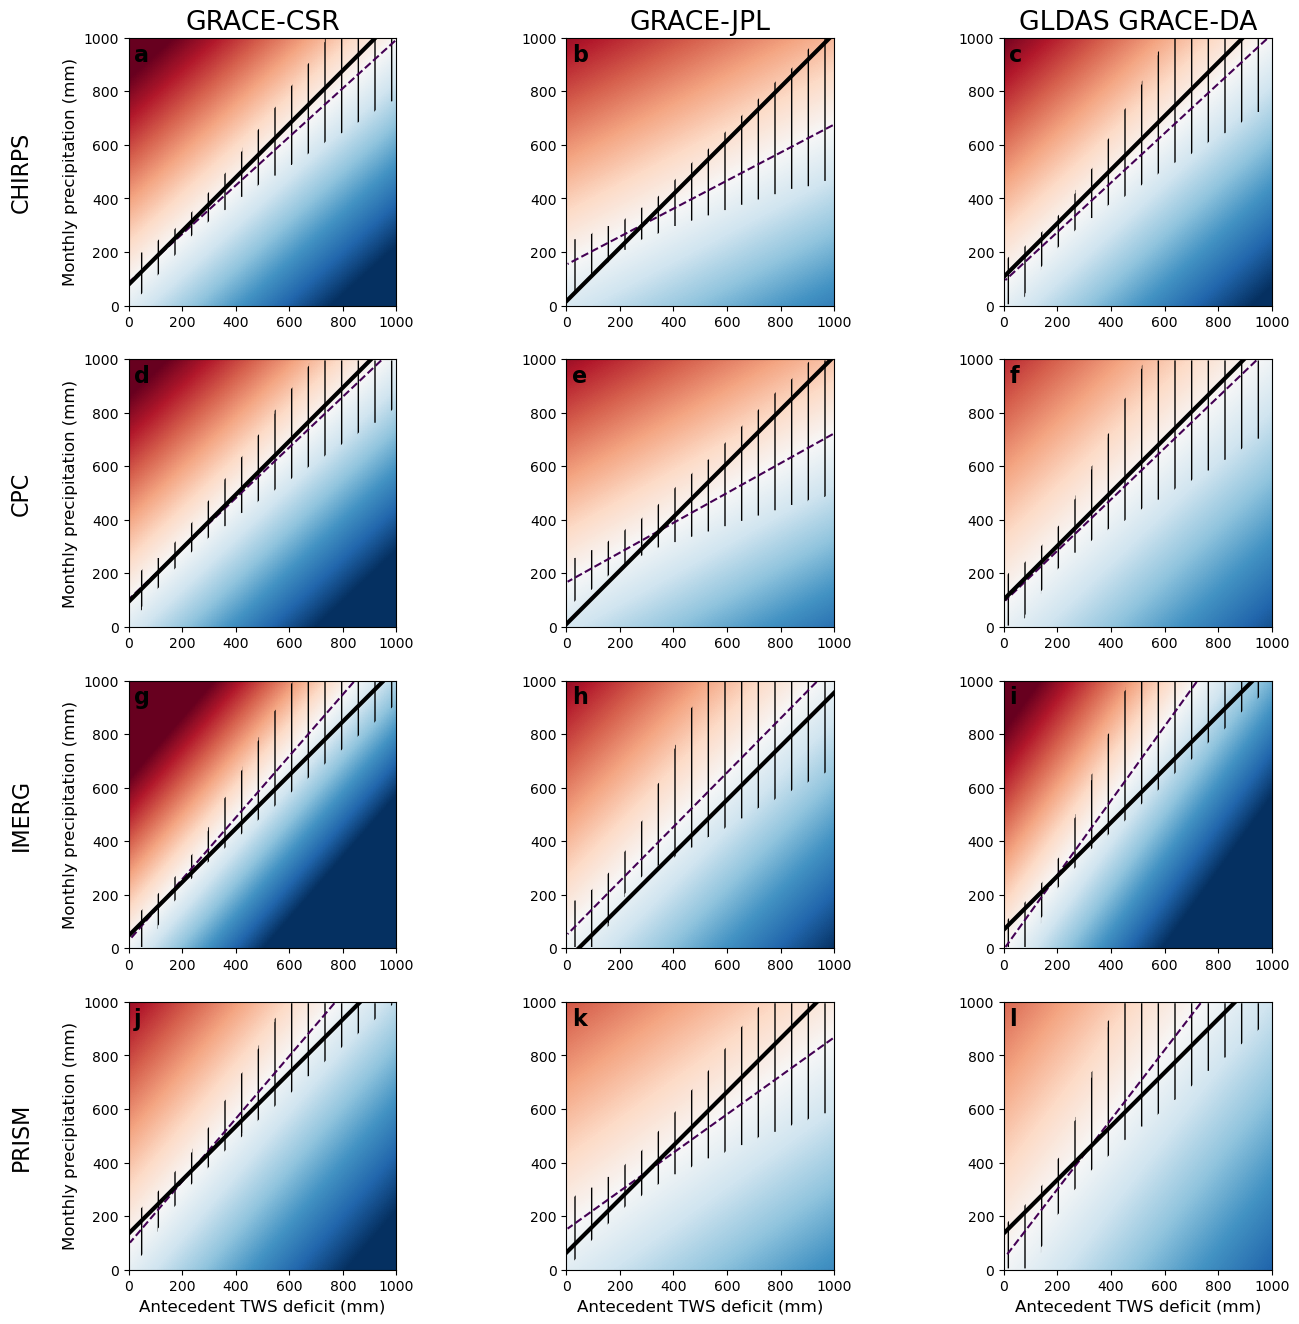

In [34]:
fig = plt.figure(figsize=(16,16))
gs = gridspec.GridSpec(nrows=4,ncols=3,figure=fig)
labels = ['a','b','c',
          'd','e','f',
          'g','h','i',
          'j','k','l']

for i,p in enumerate(prod_comb):
    ax = plt.subplot(gs[i])
    ax.imshow(sep_lag1_me0[i].mean(axis=-1),origin='lower',extent=[0,1000,0,1000],cmap='RdBu',vmin=-0.02,vmax=0.02)
    ax.contour(sep_lag1_me0[i].mean(axis=-1),levels=[0],origin='lower',extent=[0,1000,0,1000],color='black',linestyles='--')
    ax.contourf((np.sign(ci_lo_me0[i])==np.sign(ci_hi_me0[i])).astype(int),levels=[-0.5,0.5],colors='none',hatches='||||',origin='lower',extent=[0,1000,0,1000])
    infl = cnty_coef_dict[p].loc['p_exc_rxmon']/-2/cnty_coef_dict[p].loc['p_exc_rxmon_sq']
    print(infl.mean())
    if infl.mean()>0:
        ax.plot([0,1000-infl.mean()],[infl.mean(),1000],color='black',lw=3)
    else:
        ax.plot([-infl.mean(),1000],[0,1000+infl.mean()],color='black',lw=3)

    ppt_prod,tws_prod=p.split("_")

    if i%3==0:
        ax.set_ylabel("Monthly precipitation (mm)",fontsize=12)
        ax.text(-0.4,0.5,ppt_prod.upper(),ha='center',va='center',rotation=90,transform=ax.transAxes)
    if i>=len(prod_comb)-3:
        ax.set_xlabel("Antecedent TWS deficit (mm)",fontsize=12)
    if i<3:
        if tws_prod=='clsm-grace':
            ax.title.set_text("GLDAS GRACE-DA")
        else:
            ax.title.set_text(tws_prod.upper())
    ax.text(0.02,0.98,labels[i],ha='left',va='top',fontsize=16,fontweight='bold',transform=ax.transAxes)
plt.savefig(os.path.join(project_dir,'figures','supp_mat','dmg_func_sep_obs_uncert.png'),bbox_inches='tight',dpi=350)
plt.savefig(os.path.join(project_dir,'figures','supp_mat','dmg_func_sep_obs_uncert.pdf'),bbox_inches='tight',dpi=350)
plt.show()